In [ ]:
!unzip /content/dataset.zip

unzip:  cannot find or open /content/dataset.zip, /content/dataset.zip.zip or /content/dataset.zip.ZIP.


In [22]:
from keras.models import Sequential
from keras.layers import Convolution2D,Flatten,Dense,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen=ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.2)
#rescale=1./255 means transform every pixel value from range [0,255] -> [0,1].

In [24]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [25]:
X_train=train_datagen.flow_from_directory("/content/drive/MyDrive/dataset/train",
                                          target_size=(128,128),
                                          batch_size=4)

Found 2746 images belonging to 5 classes.


In [ ]:
X_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [38]:
model=Sequential()

In [39]:
#1)convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [40]:
#1)maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [41]:
#2)convolution layer
model.add(Convolution2D(32,(3,3),activation='relu'))

In [42]:
#2)maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [43]:
#Flatten layer
model.add(Flatten())

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
Total params: 10144 (39.62 KB)
Trainable params: 10144

In [45]:
model.add(Dense(300,activation='relu'))#hidden layer
model.add(Dense(150,activation='relu'))#hidden layer
model.add(Dense(5,activation='softmax'))#output layer

In [50]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [48]:
# training the model

model.fit_generator(X_train,epochs = 30)


Epoch 1/30


<ipython-input-48-55a0e9544b94>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(X_train,epochs = 30)


687/687 [==============================] - 771s 1s/step - loss: 1.3749 - accuracy: 0.4286
Epoch 2/30
687/687 [==============================] - 169s 245ms/step - loss: 1.1464 - accuracy: 0.5415
Epoch 3/30
687/687 [==============================] - 180s 263ms/step - loss: 1.0310 - accuracy: 0.5972
Epoch 4/30
687/687 [==============================] - 173s 251ms/step - loss: 0.9661 - accuracy: 0.6154
Epoch 5/30
687/687 [==============================] - 171s 248ms/step - loss: 0.8781 - accuracy: 0.6570
Epoch 6/30
687/687 [==============================] - 173s 252ms/step - loss: 0.8043 - accuracy: 0.6810
Epoch 7/30
687/687 [==============================] - 174s 254ms/step - loss: 0.7441 - accuracy: 0.7058
Epoch 8/30
687/687 [==============================] - 180s 262ms/step - loss: 0.7207 - accuracy: 0.7200
Epoch 9/30
687/687 [==============================] - 193s 281ms/step - loss: 0.6540 - accuracy: 0.7513
Epoch 10/30
687/687 [==============================] - 177s 258ms/step - loss:

In [51]:
model.save('flowers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
import numpy as np
from keras.preprocessing import image

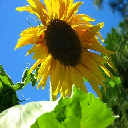

In [59]:
# testing 1

img = image.load_img('/content/drive/MyDrive/dataset/test/Image_1.jpg',target_size =(128,128))
img

In [60]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 116ms/step


'sunflower'

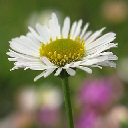

In [81]:
# testing 2

img = image.load_img('/content/drive/MyDrive/dataset/test/Image_102.jpg',target_size =(128,128))
img

In [82]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 30ms/step


'daisy'

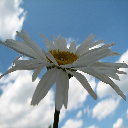

In [63]:
# testing 3

img = image.load_img('/content/drive/MyDrive/dataset/test/Image_137.jpg',target_size =(128,128))
img

In [65]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','sunflower']
op[pred]

1/1 [==============================] - 0s 37ms/step


'daisy'

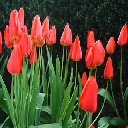

In [87]:
# testing 4

img = image.load_img('/content/drive/MyDrive/dataset/test/Image_696.jpg',target_size =(128,128))
img

In [88]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 32ms/step


'tulip'

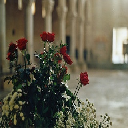

In [92]:
# testing 5

img = image.load_img('/content/drive/MyDrive/dataset/test/Image_97.jpg',target_size =(128,128))
img

In [93]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 47ms/step


'rose'

In [94]:
model.save('project.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
